## Intro

안녕하세요, 데이크루 3기 💬Irene 팀입니다! 

<파이썬으로 챗봇 만들기🤖>  6번째 회차부터는 우리가 지난 시간에 만든 챗봇 엔진 서버를 카카오톡과 같은 **메신저 플랫폼과 직접 통신해 챗봇 엔진의 기능을 사용할 수 있도록 챗봇 API 서버를 만드는 것**을 다룰 예정입니다!

이를 수행하기 위해서 먼저 **Flask**에 대해 알아보도록 하겠습니다! 🤗 

본 포스팅은 데이콘 서포터즈 “데이크루" 3기 활동의 일환입니다.

# 9.1 챗봇 API 소개

지난 챕터에서 만든 챗봇 엔진 서버와 직접 통신해 다양한 메신저 플랫폼(카카오톡, 네이버톡톡 등)이 챗봇 엔진의 기능을 사용할 수 있도록 챗봇 API 서버를 만들어 보겠습니다.

아래 <챗봇 시스템 구조> 그림은 참고하는 책에서 만들고 있는 챗봇 시스템의 구조입니다. 지금까지 화자의 질의를 해석해서 알맞은 답변을 제공하는 챗봇 엔진 구현에 초점을 맞추었다면, 이번 시간부터는 **다양한 메신저 플랫폼과 어떻게 통신을 하며, 챗봇 엔진의 해석 결과를 메신저 플랫폼 상에서 어떻게 말풍선으로 보여줄 것인지**에 대해 알아볼 예정입니다.

<챗봇 시스템 구조>
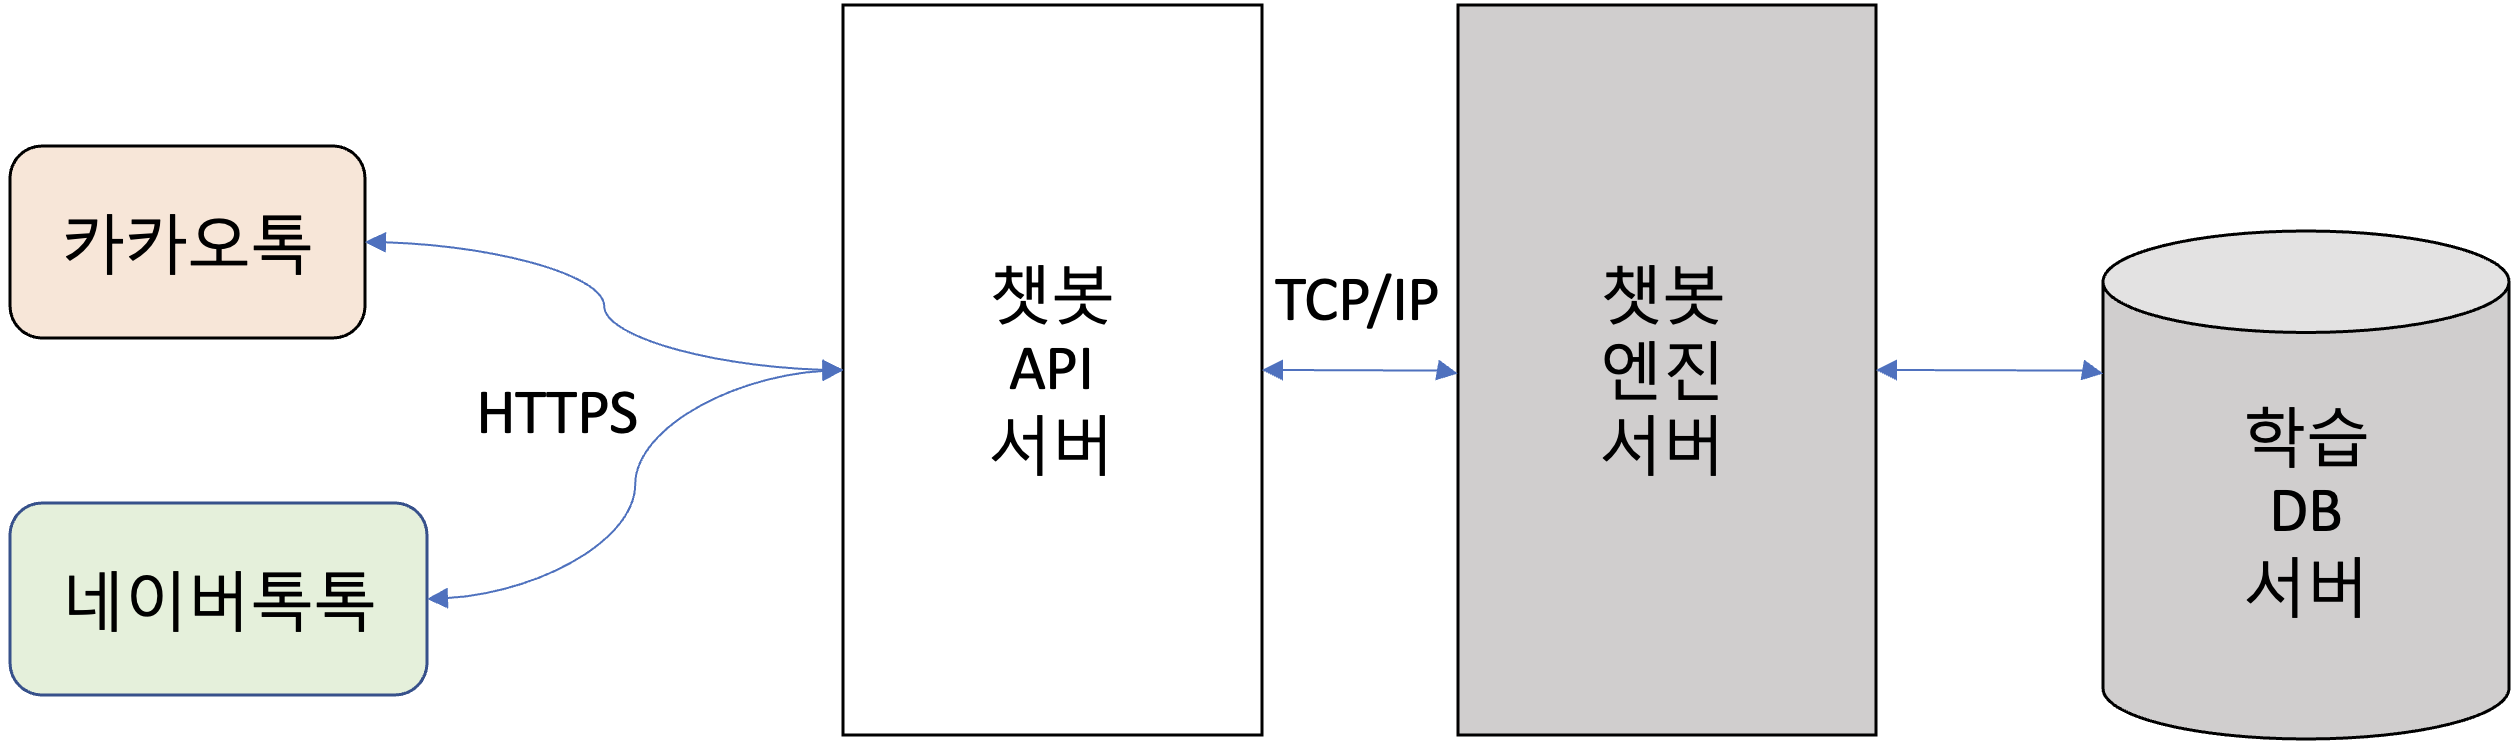

- **챗봇 API 서버**: 메신저 플랫폼과 챗봇 엔진 사이에서 서로 데이터를 주고받을 수 있도록 하는 인터페이스 역할을 합니다.
    - 중간에 API 서버 계층을 두지 않으면 각 플랫폼마다 통신 프로토콜리 다르기 때문에 새로운 플랫폼이 추가될 때마다 챗봇 엔진 서버 프로그램을 수정해야 하는 문제점이 생깁니다. 따라서 API 서버 계층을 둠으로써 각 메신저 플랫폼이 요구하는 통신 프로토콜을 API 서버에서 처리하고, 챗봇 엔진 서버와는 동일한 프로토콜로 통신을 할 수 있습니다.
- **REST API 방식**: 챗봇 기능을 지원하는 메신저 플래폼과 통신하기 위한 방식
    - 웹(HTTP) URI(Uniform Resource Indentifier)를 통해 자원을 명시하고, HTTP 메서드(GET, POST, OUT, DELETE)를 통해 해당 자원에 대한 CRUD 동작을 처리하는 API 호출 방식입니다.

다른 메신저 플랫폼과의 통신을 위해 우리도 REST API를 지원하는 챗봇 API 서버를 구축해야 합니다. 

그럼 본격적으로 챗봇 API 서버를 만들어볼까요?

(챗봇 엔진 서버와 직접 통신하기 위해 필요한 프로토콜은 앞 챕터에서 미리 정의하였습니다.)

# 9.2 파이썬 Flask

REST API는 웹(HTTP) 상에서 호출할 수 있도록 웹 애플리케이션 형태로 만들어야 합니다. 우리에게 익숙한 언어인 파이썬을 사용하여 구현하도록 하겠습니다. 

파이썬에서 웹을 구동시키기 위해서는 별도의 프레임워크 **Flask**를 사용해야합니다.

**Flask**란, 파이썬 기반으로 경량화된 프레임워크로 구현이 간단하고 웹 서비스 구현에 있어 자유도가 높아 REST API 서버 개발에 많이 사용하고 있습니다.

## 9.2.1 Hello Flask

Flask를 사용하기 앞서 동작 방식에 대해 먼저 이해해보겠습니다. 예시로 간단하게 ‘Hello Flask’ 문자열을 웹 페이지로 띄우는 웹 애플리케이션을 만들어 보겠습니다.

적당한 곳에 /hello_flask 디렉터리를 만들고 app.py 파일을 생성하여 코드를 작성합니다.

프레임워크를 사용하기 위해 flask 패키지에서 Flask 모듈을 불러옵니다. (필요시 pip install을 통해 설치)

이때 Flask 클래스의 생성자로 현재 실행되는 애플리케이션 모듈명을 전달해야 합니다. 파이썬 전역 변수인 `__name__`을 사용하면 현재 실행되는 애플리케이션의 모듈명이 자동으로 들어갑니다.

In [ ]:
from flask import Flask
app = Flask(__name__)

브라우저 상에서 특정 URI를 호출했을 때 실행되는 함수를 정의합니다. 이때 함수의 결과값이 웹 브라우저 화면에 보이기 때문에 뷰(view) 함수라고도 합니다. (hello() 함수)

Flask 프레임워크는 호출되는 URI를 처리하는 함수를 연결할 수 있는 방법을 제공하는데, 이를 라우트라고 하며, @app.route() 데커레이터를 사용합니다.

라우트 데커레이터 인자에 해당 뷰 함수와 연결된 URI를 지정할 수 있습니다. 여기서는 루트(/) URI를 호출했을 때 실행되는 뷰 함수를 정의한 것입니다.

In [ ]:
@app.route('/')
def hello():
   return 'Hello Flask'

if __name__ == '__main__':
   app.run()

`app.run()`을 통해 메일 모듈로 실행되는 경우 (__main__)에만 Flask를 실행되도록 합니다. 

위 코드로 Flask 서버를 구동한 후 웹 브라우저에서 http://127.0.0.1:5000 주소로 접속하면 다음과 같이 브라우저에서 결과를 확인할 수 있습니다.

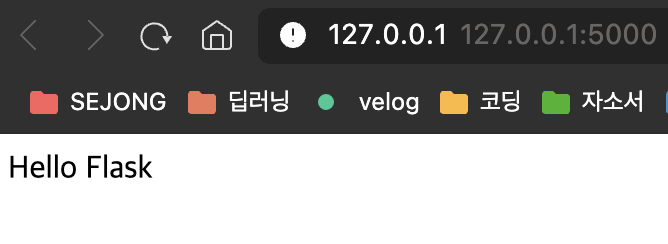

## 9.2.2 URI 동적 변수

REST API는 HTTP 메서드 (**GET, POST, DELETE, PUT**)에 따라 URI를 호출하고, 이때 필요한 기능에 따라 URI에 동적으로 변수가 들어갈 수 있습니다. 따라서 이번에는 URI에서 어떻게 동적으로 변수를 처리하는지 알아봅시다.

새로 추가된 '/info/<name>' URI와 연결된 뷰 함수를 살펴보면 <name>은 URI에서 사용되는 동적 변수로, 예를 들어 http://127.0.1/info/DACON 주소로 접속했을 때 해당 URI와 연결된 get_name() 뷰 함수를 호출합니다. 이때 뷰 함수 인자 name에는 ‘DACON’ 문자열이 입력됩니다.

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello():
   return 'Hello Flask'

@app.route('/info/<name>')
def get_name(name):
   return "hello {}".format(name)

그다음  '/user/<int:id>' URI와 연결된 뷰 함수를 살펴보면 라우트 데커레이터 인자에 사용되는 URI의 변수 부분에는 데이터 타입을 지정할 수 있습니다. 여기서는 URI 변수 (id)의 데이터 타입으로 정수형(int)이 지정되었습니다. (API 호출에서 문자열 데이터를 사용하는 경우엔 해당 URL을 찾을 수 없다는 오류 페이지를 출력합니다.)

이때 데이터 타입을 생략하는 경우 기본적으로 문자열 데이터 타입으로 인식됩니다.

In [ ]:
@app.route('/user/<int:id>')
def get_user(id):
   return "user id is {}".format(id)

다음 코드와 같이 하나의 뷰 함수에 여러 개의 URI를 지정할 수 있습니다. 2개의 URI를 send_message() 함수에 연결하고, JSON 포맷으로 출력합니다.

In [ ]:
@app.route('/json/<int:dest_id>/<message>')
@app.route('/JSON/<int:dest_id>/<message>')
def send_message(dest_id, message):
      json = {
         "bot_id": dest_id,
         "message": message
      }
      return json

## 9.2.3 기본적인 REST API 서비스 구현

REST API는 기능에 따라 **GET, POST, DELETE, PUT** HTTP 메서드를 사용합니다. 클라이언트로부터 요청이 들어왔을 때 HTTP 메서드별로 뷰 함수를 정의하는 방법에 대해 알아봅시다.

다음은 REST API에서 CRUD 동작이 어떤 HTTP 메서드와 매핑되어 있는지 설명하는 표입니다. *(여기서는 주로 POST, GET 메서드만 다룹니다.)*

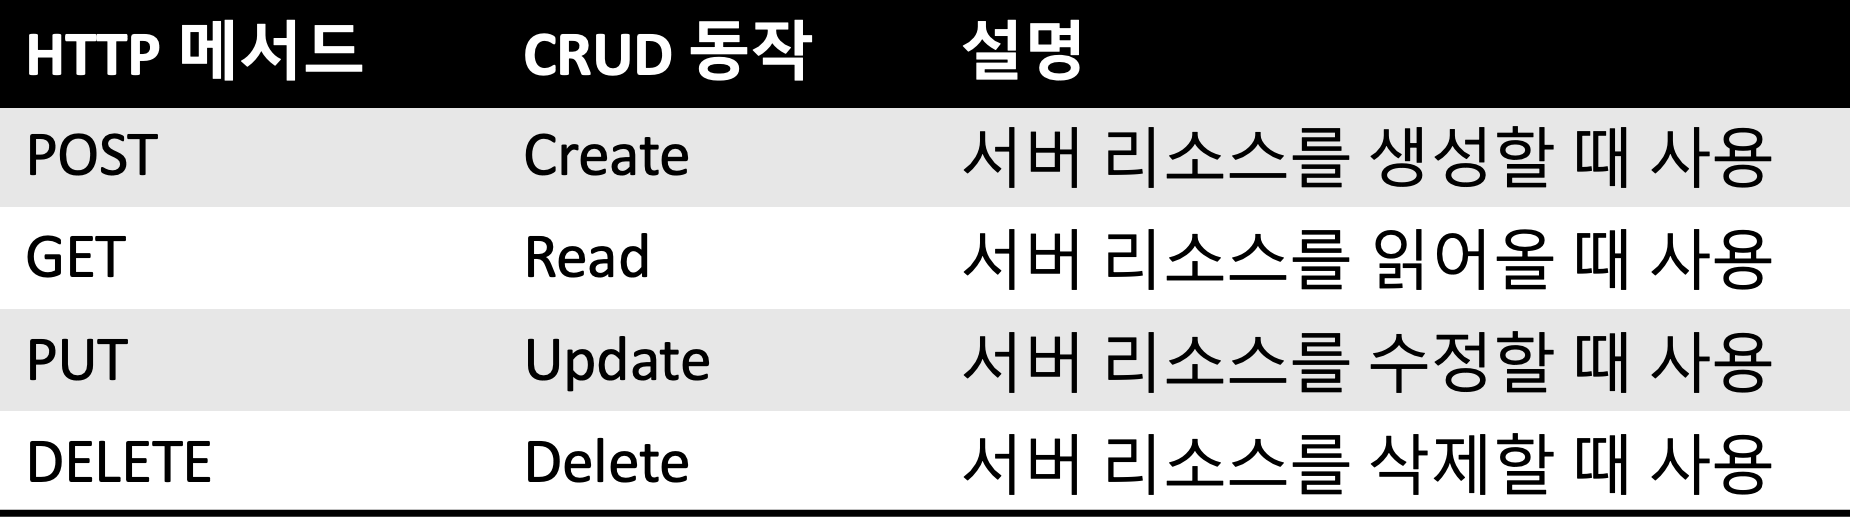

예제를 위해 /basic_restapi 디렉터리를 만들고 app.py 파일을 생성하여 GET, POST 방식으로 REST API를 호출했을 때 JSON 포맷으로 응답하는 예제를 살펴봅시다.

* request 모듈은 클라이언트로부터 HTTP 요청을 받았을 때 요청 정보를 확인할 수 있습니다.

* jsonify 모듈은 데이터 객체를 JSON 응답으로 변환해주는 Flask의 유틸리티 함수입니다.

웹 서버의 리소스를 표현하기 위해 resource 리스트를 만들어 GET, POST 메서드로 호출된 REST API를 통해 해당 리소스에 객체를 추가하고 불러오도록 구현합니다.

In [ ]:
from flask import Flask, request, jsonify
app = Flask(__name__)

# 서버 리소스
resource = []

user_id에 맞는 사용자 정보를 조회하는 GET 메서드의 REST API를 정의했습니다. GET 메서드의 경우 라우트 데커레이터 인자에서 methods를 생략할 수 있습니다.

사용자 정보 조회 REST API에 연결되어 있는 get_user() 함수는 리소스를 탐색해 user_id 값으로 저장된 데이터가 있는 경우 해당 객체를 JSON으로 응답합니다.

In [ ]:
# 사용자 정보 조회
@app.route('/user/<int:user_id>', methods=['GET'])
def get_user(user_id):
    for user in resource:
        if user['user_id'] is user_id:
            return jsonify(user)

    return jsonify(None)

다음은 사용자 정보를 추가하는 POST 메서드입니다. add_user 함수는 HTTP 요청 시 Body에 포함된 JSON 데이터를 서버 리소스에 추가한 후 현재 저장된 전체 리소스 데이터를 JSON으로 변환해 응답합니다. 

`request.get_json()` 함수를 통해 HTTP 요청 Body의 JSON 객체를 딕셔너리 형태로 가져온 후, `jsonify()` 함수를 통해 resource 리스트를 JSON 응답 형태로 반환합니다.

In [ ]:
# 사용자 추가
@app.route('/user', methods=['POST'])
def add_user():
    user = request.get_json() # HTTP 요청의 body에서 json 데이터 불러옴
    resource.append(user) # 리소스 리스트에 추가
    return jsonify(resource)

if __name__ == '__main__':
   app.run()

**<예제 작동 테스트>**

위 예제를 실행해 Flask 서버를 구동하고 우리가 작성한 REST API가 잘 작동하는지 테스트해야 합니다. API가 GET 메서드인 경우에는 브라우저 상에서 해당 주소로 접속하면 작동 결과를 확인할 수 있지만, POST 메서드인 경우에는 따로 POST 전송 웹 애플리케이션을 만들지 않는 한 테스트할 수 없습니다.

이를 위해 크롬 브라우저에서 작동하는 무료 확장 프로그램인 **Talend API Test** 툴을 통해 REST API를 테스트 해보겠습니다.




1. 크롬 웹 스토어에 ‘Talend API Tester’를 검색해 크롬 브라우저에 추가합니다.
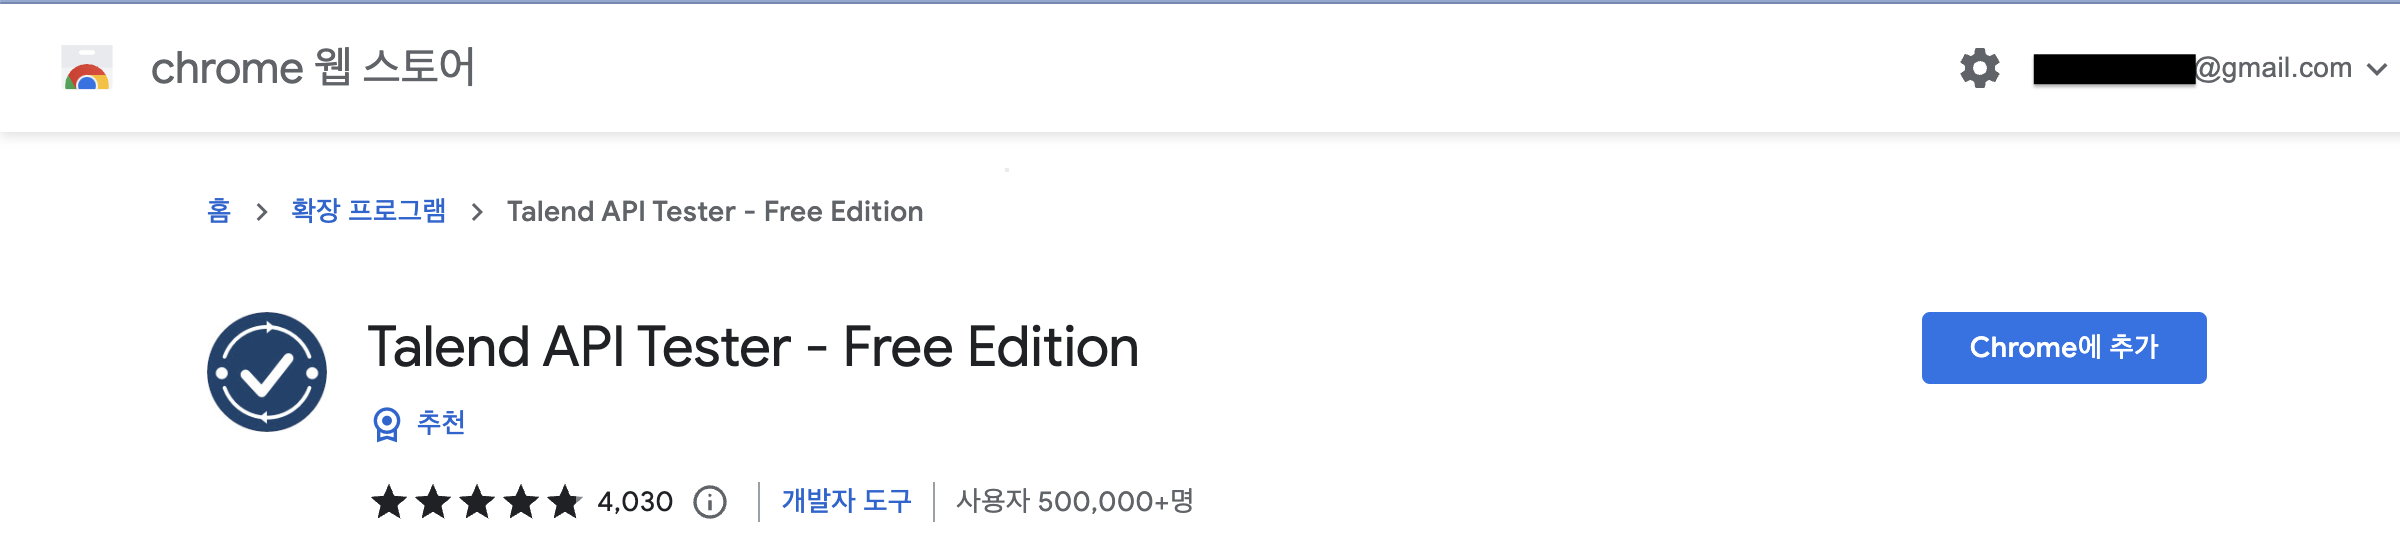

2. ‘Talend API Tester’에서 회원정보를 추가하는 API 호출을 먼저 테스트합니다. 회원정보 추가 REST API 호출 정보는 다음과 같습니다.

* URI : METHOD는 POST를 선택하고, URI에 밑의 주소를 입력합니다.
POST http://127.0.0.1:5000/user

* Body: 추가할 사용자 정보를 JSON 형태로 입력한 후 ‘Send’ 버튼을 누릅니다.
		{"user_id": 1,>
		"name": "Irene",
		"age": 20}

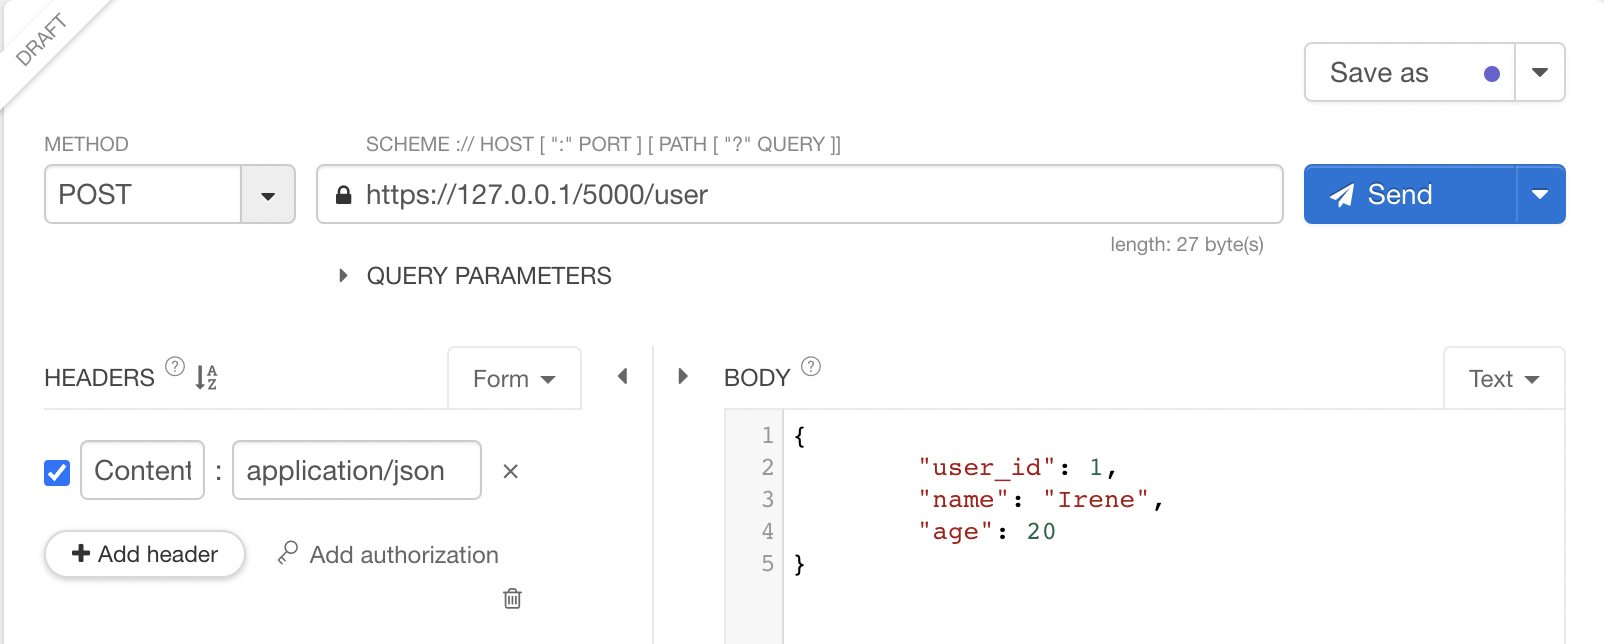

3. REST API 서버에서 받은 응답을 확인합니다.

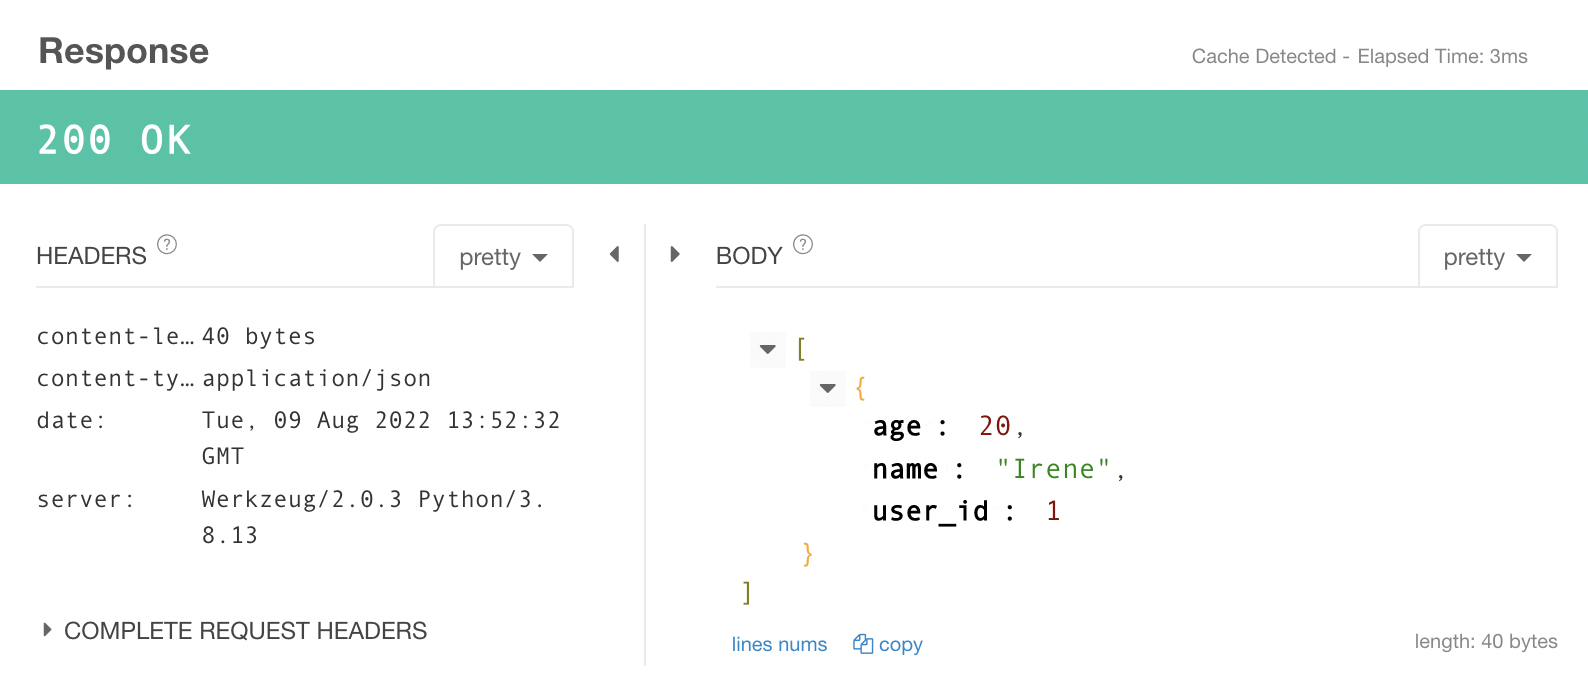

4. 추가한 회원정보를 조회하는 API를 호출해봅시다. 회원정보 조회 REST API 호출 정보는 다음과 같습니다.

- URI
    
    user_id에는 1을 사용합니다. METHOD는 GET을 선택하고 URI에는 GET http://127.0.0.1:5000/user/1을 입력한 후 ‘Send’ 버튼을 누릅니다.

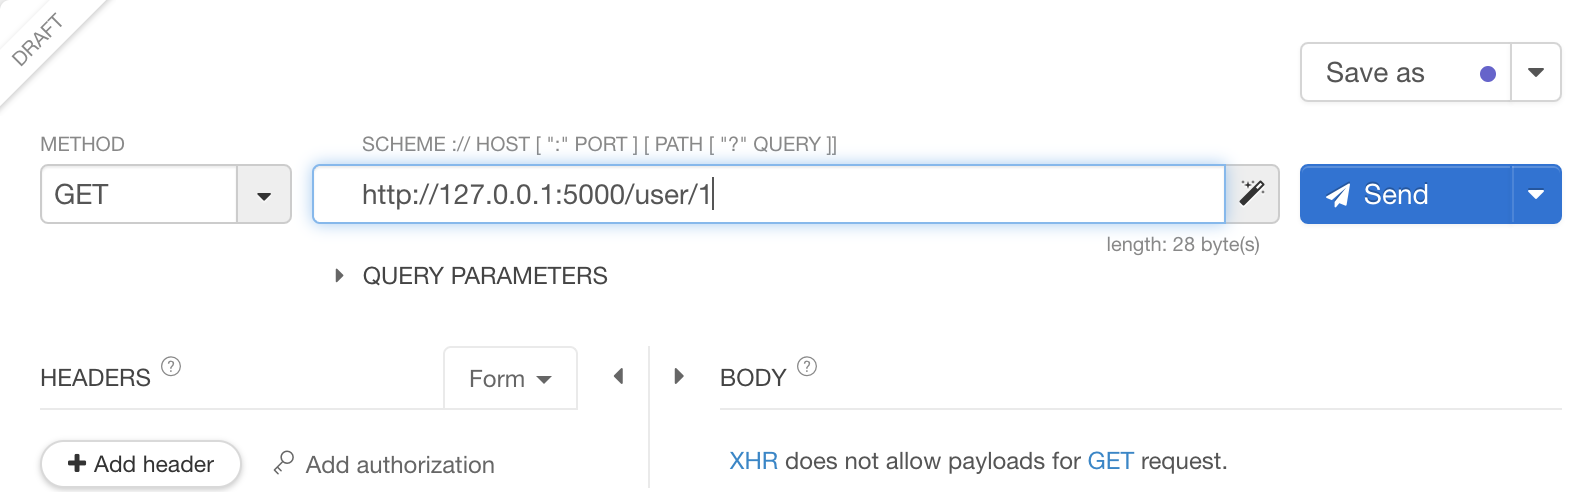

5. REST API 서버에서 받은 응답을 보여줍니다. 현재 서버에 저장되어 있는 회원 정보를 JSON 형태로 받은 것을 확인할 수 있습니다.

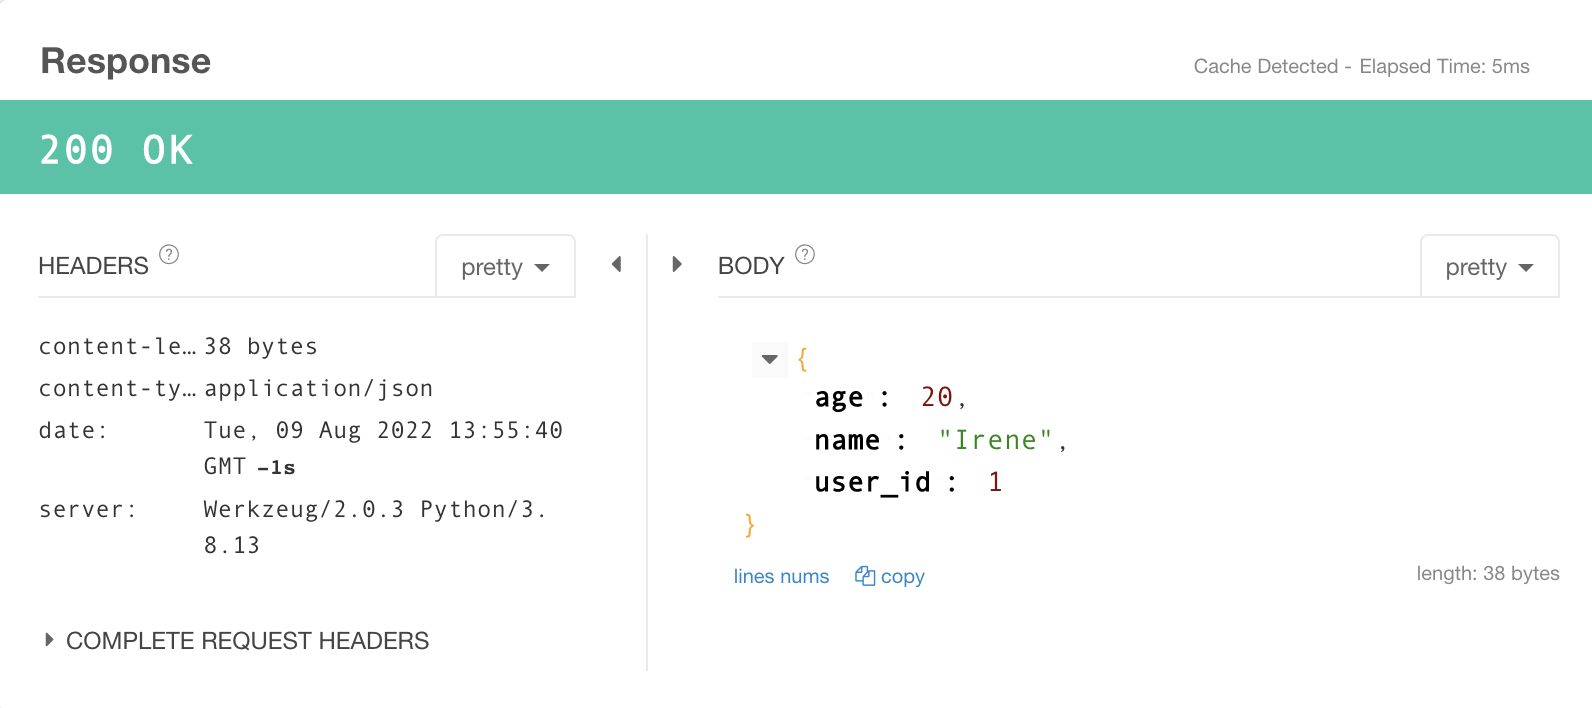

## 9.3 챗봇 API 서버 구현

위에서 REST API를 사용하여 서버가 만들어진 이후에는 Flask 프레임워크를 이용하여 손쉽게 API 서버를 만들 수 있습니다.

In [ ]:
#URL
POST /query/<bot_type>
#BODY
{
     “query”: ‘아이린 챗봇을 만들고 있습니다!’
}

/chatbot_api 디렉터리를 생성한 후 메인 모듈로 app.py 파일을 만들어 REST API 서버를 구현할 수 있습니다. 

In [ ]:
from flask import Flask, request, jsonify, abort
import socket
import json

# 챗봇 엔진 서버 접속 정보
host = "127.0.0.1"  # 챗봇 엔진 서버 IP 주소
port = 5050  # 챗봇 엔진 서버 통신 포트

# Flask 어플리케이션
app = Flask(__name__)


# 챗봇 서버와 통신
def get_answer_from_engine(bottype, query):
    # 챗봇 엔진 서버 연결
    mySocket = socket.socket()
    mySocket.connect((host, port))

    # 챗봇 엔진 질의 요청
    json_data = {
        'Query': query,
        'BotType': bottype
    }
    message = json.dumps(json_data)
    mySocket.send(message.encode())

    # 챗봇 엔진 답변 출력
    data = mySocket.recv(2048).decode()
    ret_data = json.loads(data)

    # 챗봇 엔진 서버 연결 소켓 닫기
    mySocket.close()

    return ret_data


# 챗봇 엔진 query 전송 API
@app.route('/query/<bot_type>', methods=['POST'])
def query(bot_type):
    body = request.get_json()

    try:
        if bot_type == 'TEST':
            # 챗봇 API 테스트
            ret = get_answer_from_engine(bottype=bot_type, query=body['query'])
            return jsonify(ret)

        elif bot_type == "KAKAO":
            # 카카오톡 처리
            pass

        elif bot_type == "NAVER":
            # 네이버톡톡 처리
            pass

        else:
            # 정의되지 않은 bot type인 경우 404 오류
            abort(404)

    except Exception as ex:
        # 오류 발생시 500 오류
        abort(500)


if __name__ == '__main__':
    app.run()

## 9.4 마치며

위와 같이 구현된 챗봇 API 서버는 이번과 다음 게시글을 통해 함께 구현해볼 네이버톡톡과 카카오톡 이외에도 페이스북, 라인 등 다양한 메신저 플랫폼과 연동할 수 있는 역할을 하며 이 플랫폼들이 요구하는 통신 프로토콜을 추상화해줍니다.

실제 API 서버를 구현할 때에는 **보안**에 신경써야 합니다. 허용된 사용자만 API를 사용할 수 있도록 인증 기능을 추가하고 불법적인 접근을 막을 수 있는 방안들을 마련해야합니다.